# <center> TP 1: Gaussian Classifiers <br> <small>Réda DEHAK<br> 2 mai 2017</small> </center>

The goal of this lab is to implement simple classifiers :
    - Random Classifier
    - Constant Classifier
    - Gaussian Classifiers
    
To write reusable code, we will use python classes to implement 
these different classifiers. We will use the <A
	HREF=http://yann.lecun.com/exdb/mnist/>MNist</A> database to implement 
digits recognition. Unpack tp1.tgz tarball contents in your working directory.







## Loading DataSet

We will use the function load_mnist from file mnist.py (thanks to V. Iovene) to load MNist Data. 

In [1]:
%pylab
%matplotlib inline 
from mnist import load_mnist
train_data, train_labels = load_mnist(dataset='training', path='./')
test_data, test_labels = load_mnist(dataset='testing', path='./')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
(train_data.shape, train_labels.shape)

((60000, 28, 28), (60000,))

train_data contains 60000 images of size 28x28 pixels, we can use plotImage 
and plotGroupeImage from visualize.py to show these images

In [3]:
(test_data.shape, test_labels.shape)

((10000, 28, 28), (10000,))

Transform train_data and test_data into a column vector for each example 

In [4]:
import numpy as np

train_data = np.reshape(train_data, (60000, 28 * 28)).T
test_data  = np.reshape(test_data,  (10000, 28 * 28)).T

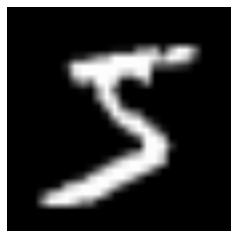

In [5]:
import visualize as vz
vz.plotImage(train_data[:,0])

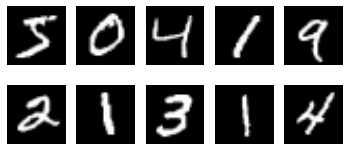

In [6]:
vz.plotGroupImages(train_data[:,0:10])

In [7]:
train_labels[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=int8)

**1.** Implement the RandomClassifier class that returns random predictions, implement the following methods:
<UL>
<LI>train(self, data, labels): data is a matrix with D rows and N columns, with N the number of examples of the training dataset, and D the dimension of each example; labels is a vector of N integers corresponding to the labels of the training dataset.
</LI>
<LI>process(self, data): which returns a vector of N integers corresponding to the predictions for the N elements contained in the matrix data.
</LI>
</UL>

In [8]:
from RandomClassifier import RandomClassifier
Q1 = RandomClassifier()
Q1.train(train_data, train_labels)
out = Q1.process(test_data)

compute Classification performance

In [9]:
(out == test_labels).sum() / test_labels.shape[0]

0.093299999999999994

**2.** Implement the MajorityClassifier class whose predictions correspond to the majority class in the training set, implementing the following methods:
<UL>
<LI><SPAN  CLASS="textbf">train(self, data, labels)</SPAN>: data is a matrix with D rows and N columns, with N the number of examples of the training dataset, and D the dimension of each example; labels is a vector of N integers corresponding to the labels of the training dataset.
</LI>
<LI><SPAN  CLASS="textbf">process(self, data)</SPAN>: which returns a vector of N integers corresponding to the predictions for the N elements contained in the matrix data.
</LI>
</UL>


In [10]:
from MajorityClassifier import MajorityClassifier
Q1 = MajorityClassifier()
Q1.train(train_data, train_labels)
out = Q1.process(test_data)
(out == test_labels).sum() / test_labels.shape[0]

0.1135

**3.** Implement the class Gaussian class Lin1_Gauss assuming that all classes $0, ..., 9$ share the same covariance matrix $\Sigma = \mathbb{1}$? Test the results of your Gaussian classifier on the test data and compute the classification performance?

In [11]:
from Lin1_GaussClassifier import Lin1_GaussClassifier
Q1 = Lin1_GaussClassifier()
Q1.train(train_data, train_labels)
out = Q1.process(test_data)
(out == test_labels).sum() / test_labels.shape[0]

0.82030000000000003

**4.** Implement a Gaussian classifier Lin2_Gauss, assuming that all classes $0, ..., 9$ share the same covariance matrix $\Sigma$. What do you notice? Explain why you have this problem?

We want to compute the covariance matrix of the data:

`cov_matrix = np.cov(train_data)`

However, the train_data matrix is composed by matrices with 0 value on the borders.
The determinant of such matrix is zero, and the matrix is not inversible.

**5.** In the recovered tarball, use the function extractFeatures 
function which extracts 10 characteristics from each image vector.

In [12]:
from extractFeature import extractFeature
Feat = extractFeature()
train_dataF = Feat.process(train_data)
test_dataF  = Feat.process(test_data)

and retrain all your previous classifiers.

In [13]:
from Lin2_GaussClassifier import Lin2_GaussClassifier

random_classifier = RandomClassifier()
maj_classifier = MajorityClassifier()
lin_classifier = Lin1_GaussClassifier()
lin2_classifier = Lin2_GaussClassifier()

random_classifier.train(train_dataF, train_labels)
maj_classifier.train(train_dataF, train_labels)
lin_classifier.train(train_dataF, train_labels)
lin2_classifier.train(train_dataF, train_labels)

In [14]:
# Random result
random_out = random_classifier.process(test_dataF)
(random_out == test_labels).sum() / test_labels.shape[0]

0.094600000000000004

In [15]:
# Majority result
majority_out = maj_classifier.process(test_dataF)
(majority_out == test_labels).sum() / test_labels.shape[0]

0.1135

In [16]:
# Lin1 result
lin_out = lin_classifier.process(test_dataF)
(lin_out == test_labels).sum() / test_labels.shape[0]

0.71240000000000003

In [17]:
# Lin2 result
lin2_out = lin2_classifier.process(test_dataF)
(lin2_out == test_labels).sum() / test_labels.shape[0]

0.73260000000000003

**6.** Compute the performance on test data for all these new training? Compare the performance of Lin1_Gauss to the result obtained in question 3? Conclude? 

The performance of Lin1_Gauss with 10 characteristics are worst than Lin1_Gauss on initial images. On initial images, we obtained 82% and with 10 characteristics we obtain 71.2%. We have an important loss of data, going from a 784 components vector to a 10 components vector. This loss of data could explain why we lost performance.

**7.** Implement the Gen_Gauss classifier (Gen_Gauss class) which assume that the different classes do not share 
the same covariance matrix? What are the performances on test data?

In [18]:
from Gen_GaussClassifier import Gen_GaussClassifier
gen_classifier = Gen_GaussClassifier()
gen_classifier.train(train_dataF, train_labels)
gen_out = gen_classifier.process(test_dataF)
(gen_out == test_labels).sum() / test_labels.shape[0]

0.86819999999999997

We can see that the generative Gaussian classifier performs better than the other ones. We obtained here 86% on the 10 characteristics images dataset.

**8.** conclude?

Generative performs better (~10% on the same data set) because it uses covariance matrix that is not the same for each class. In addition, Generative could perform better if it would follow a Gauss distribution. We could either find the right distribution (which is too hard), or use a Gaussian Mixture Model.